# 📊 Kaggle Survey 2021 : South Korea📋

<br>
This year, as in 2017, 2018, 2019, and 2020 we set out to conduct an industry-wide survey that presents a truly comprehensive view of the state of data science and machine learning. The survey was live from 09/01/2021 to 10/04/2021, and after cleaning the data we finished with 25,973 responses!

<br>

There's a lot to explore here. The results include raw numbers about who is working with data, what’s happening with machine learning in different industries, and the best ways for new data scientists to break into the field. We've published the data in as raw a format as possible without compromising anonymization, which makes it an unusual example of a survey dataset.
<br>

<img class="thumb_g_article" data-org-src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSereDD4fECx2-ML1qogKC6LhW72i9GSc2S0w&usqp=CAU" data-org-width="200" dmcf-mid="cCD3JaWEk0" dmcf-mtype="image" height="auto" src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSereDD4fECx2-ML1qogKC6LhW72i9GSc2S0w&usqp=CAU" width="200">

<br>

# To Anyone reading This Notebook.
- While I was studying data visualization, but I found out about Kaggle users in other countries, but there was no content related to Korea, so I wrote it. Thank you for taking a good look

<b>- If useful, Don't forget vote!</b>




# Content & Conclusion
<b>- Load Dataset</b>

<b>- Where do Kagglers Currently Reside?</b>
    
    - Conclusion
        - In Korea, about 11% of the people who use the Kaggle site are Korean nationals.
          It is on the small side compared to other countries, but as Korea is gradually developing into an IT 
          powerhouse, I think that there will be more Kaggle users in Korea.
<b>- Comparsion of Gender Distributio</b>

    - Conclusion
        - Similar to other countries, Korea hs Kaggle users with a similar gender ratio.
          About 80% men and about 20% women.
<b>- Comparsion of Degree</b>

    - Conclusion
        - Compared to Kaggle users in other countries, Korean Kaggle users have far more bachelor's degree than
          those with master's degree. You can also see that there are many people who have a bachelor's degree
          for non-computer majors.
<b>- Comparsion of Role Landscap</b>

    - Conclusion
        - Compared to Kaggle users in other countries, Korean Kaggle users and other countries Kaggle users have
          similar job distribution.

<b>- Age distribution among Kaggler's</b>

    - Conclusion
        - Compared to Kaggle users in other countries, Korean Kaggle users and other countries Kaggle users have
          similar Age distribution.


<b>- Career Distribution among Korean kaggelrs</b>

    - Conclusion
        - Unlike Kaggle users in other countries, the difference in numbers for korea kaggle users is small,
          but it can be seen that Kaggle activity decrease as experience accumulates.

<b>- kinds of Kaggler's Occupation</b>

    - Conclusion
        - Compared to Kaggle users in other countries, Korean Kaggle users and other countries Kaggle users have
          similar kinds of kaggler's occupation. but manufactoring/fabrication employeer are activity more than other 
          countires kaggle users.

<b>- Reference</b>

<a id="top"></a>
<div class="list-group" id="list-tab" role="tablist">
<h3 class="list-group-item list-group-item-action active" data-toggle="list" style='color:white; background-image:url("https://storage.googleapis.com/kaggle-competitions/kaggle/31480/logos/header.png?t=2021-10-05-16-58-19"); border:0' role="tab" aria-controls="home">
<left><font size = '30'>Load Dataset</font></left></h3>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, Ellipse

plt.rcParams.update({'font.size' : 5})
from math import pi

import warnings
warnings.filterwarnings("ignore")

data_org = pd.read_csv('../kaggle_survey/data/kaggle_survey_2021_responses.csv', low_memory= False)
data = data_org[1:].reset_index(drop = True)

other_color = "salmon"
korea_color = "skyblue"
data['korea'] = data['Q3'] == 'South Korea'

<a id="top"></a>
<div class="list-group" id="list-tab" role="tablist">
<h3 class="list-group-item list-group-item-action active" data-toggle="list" style='color:white; background-image:url("https://storage.googleapis.com/kaggle-competitions/kaggle/31480/logos/header.png?t=2021-10-05-16-58-19"); border:0' role="tab" aria-controls="home">
<left><font size = '30'>Where do Kagglers Currently Reside?</font></left></h3>

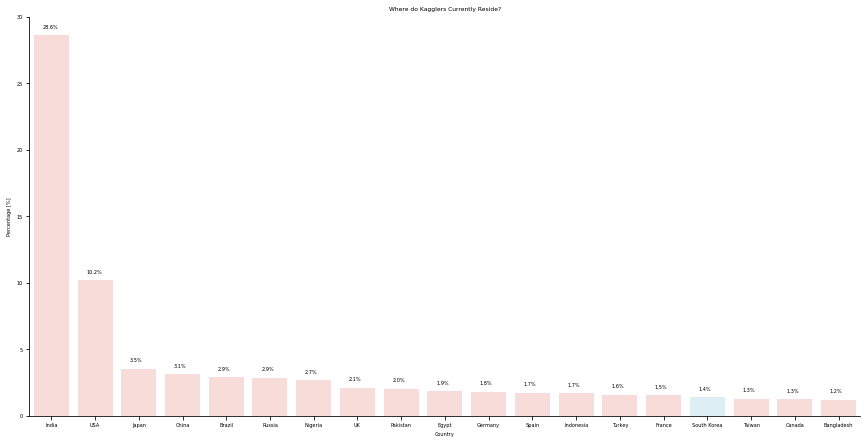

In [2]:
df1 = data['Q3'].value_counts(normalize = True)
df1 = df1.mul(100)           # 각 100을 곱한 것이다.
df1 = df1.rename('percent').reset_index()
df1 = df1.iloc[:20]
df1 = df1.drop([2])
df1['index'] = df1['index'].replace({'United States of America' : 'USA', 
                                    'United Kingdom of Great Britain and Northern Ireland' : 'UK'})

g = sns.catplot(x = 'index', y = 'percent', kind = 'bar', data = df1,
               height = 6, aspect = 4/2, palette= [other_color, other_color, other_color, other_color, 
                                                   other_color, other_color, other_color, other_color, 
                                                   other_color, other_color, other_color, other_color, 
                                                   other_color, other_color, other_color, korea_color], alpha = 0.3)
g.ax.set_ylim(0, 30)
for p in g.ax.patches:
    txt = str(p.get_height().round(1)) + '%'
    txt_x = p.get_x() + 0.2
    txt_y = p.get_height() + 0.5
    g.ax.text(txt_x, txt_y , txt)

g.ax.set_xlabel('Country')
g.ax.set_ylabel('Percentage [%]')
g.ax.set_title('Where do Kagglers Currently Reside?')
plt.show()

<a id="top"></a>
<div class="list-group" id="list-tab" role="tablist">
<h3 class="list-group-item list-group-item-action active" data-toggle="list" style='color:white; background-image:url("https://storage.googleapis.com/kaggle-competitions/kaggle/31480/logos/header.png?t=2021-10-05-16-58-19"); border:0' role="tab" aria-controls="home">
<left><font size = '30'>Comparsion of Gender Distribution</font></left></h3>

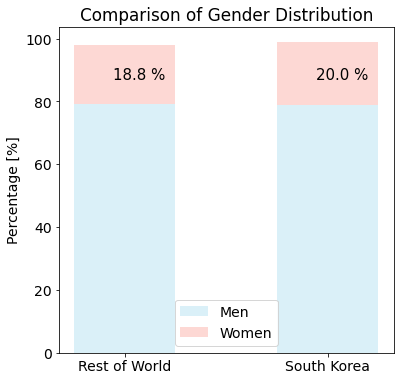

In [3]:
temp = data.groupby('korea')['Q2'].value_counts().to_frame()
temp.columns = ['amount']
temp = temp.reset_index(drop = False)
temp = temp.pivot(index = 'korea', columns='Q2')['amount']

temp['all'] = temp.sum(axis = 1)
plt.rcParams.update({'font.size' : 14})
for c in temp.columns:
    temp[c] = temp[c] / temp['all'] * 100

temp = temp.drop('all', axis = 1)
width = 0.5

f, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (6, 6))
ax.bar(['Rest of World', 'South Korea'], temp['Man'].values, 
       width, label = 'Men', color = ['skyblue', 'skyblue'], alpha = 0.3)
ax.bar(['Rest of World', 'South Korea'], temp['Woman'].values, width, 
       bottom = temp['Man'].values, label = 'Women', color = ['salmon', 'salmon'], alpha = 0.3)

ax.annotate('18.8 %', [-0.06, 87], fontsize=15)
ax.annotate('20.0 %', [1-0.06, 87], fontsize=15)

ax.set_ylabel('Percentage [%]')
ax.set_title('Comparison of Gender Distribution')
ax.legend(loc='lower center')

plt.show()

In [56]:
temp = data.groupby('korea')['Q2'].value_counts().to_frame()
temp

Q2
korea Q2                            
False Man                      20315
      Woman                     4818
      Prefer not to say          351
      Nonbinary                   88
      Prefer to self-describe     42
True  Man                        283
      Woman                       72
      Prefer not to say            4

<a id="top"></a>
<div class="list-group" id="list-tab" role="tablist">
<h3 class="list-group-item list-group-item-action active" data-toggle="list" style='color:white; background-image:url("https://storage.googleapis.com/kaggle-competitions/kaggle/31480/logos/header.png?t=2021-10-05-16-58-19"); border:0' role="tab" aria-controls="home">
<left><font size = '30'>Comparsion of Degree</font></left></h3>

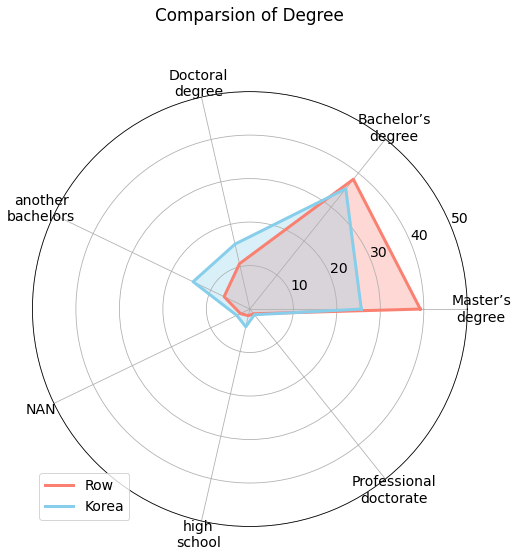

In [4]:
temp = data.groupby('korea')['Q4'].value_counts().to_frame()
temp.columns = ['amount']
temp = temp.reset_index(drop = False)
temp = temp.pivot(index = 'korea', columns='Q4')['amount']

temp['all'] = temp.sum(axis = 1)
for c in temp.columns:
    temp[c] = temp[c] / temp['all'] * 100

temp = temp.drop('all', axis = 1)
temp = temp[data['Q4'].value_counts().index]
temp.rename(columns={'Some college/university study without earning a bachelor’s degree' : 'another bachelor''s',
                    'I prefer not to answer' : 'NAN', 'No formal education past high school' : 'high school'}, inplace = True)

categories = list([c.replace(' ', '\n') for c in temp.columns])
angles = [n / float(len(categories)) * 2 * pi for n in range(len(categories))]
angles += angles[:1]

fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (8, 8), subplot_kw=dict(polar = True))
plt.xticks(angles[:-1], categories)
plt.ylim(0, 50)

values = temp.iloc[0].values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, other_color, linewidth = 3, linestyle = 'solid', label = 'Row')
ax.fill(angles, values, other_color, alpha = 0.3)

values = temp.iloc[1].values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, korea_color, linewidth = 3, linestyle = 'solid', label = 'Korea')
ax.fill(angles, values, korea_color, alpha = 0.3)
plt.title('Comparsion of Degree\n\n')
plt.legend(loc = 'lower left')
plt.show()

<a id="top"></a>
<div class="list-group" id="list-tab" role="tablist">
<h3 class="list-group-item list-group-item-action active" data-toggle="list" style='color:white; background-image:url("https://storage.googleapis.com/kaggle-competitions/kaggle/31480/logos/header.png?t=2021-10-05-16-58-19"); border:0' role="tab" aria-controls="home">
<left><font size = '30'>Comparsion of Role Landscap</font></left></h3>

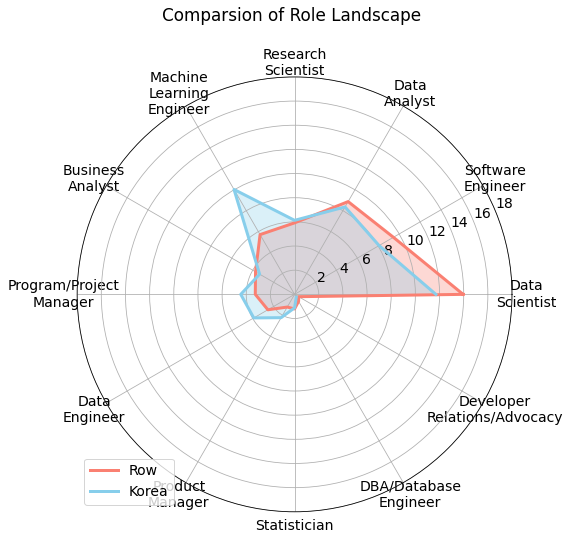

In [5]:
temp = data.groupby('korea')['Q5'].value_counts().to_frame()

temp.columns = ['amount']
temp = temp.reset_index(drop = False)
temp = temp.pivot(index = 'korea', columns='Q5')['amount']

temp['all'] = temp.sum(axis = 1)
for c in temp.columns:
    temp[c] = temp[c] / temp['all'] * 100

temp = temp.drop(['all'], axis = 1)
temp = temp[data['Q5'].value_counts().index]

temp = temp.drop(['Currently not employed', 'Other', 'Student'], axis = 1)
categories = list([c.replace(' ', '\n') for c in temp.columns])

angles = [n / float(len(categories)) * 2 * pi for n in range(len(categories))]
angles += angles[:1]

fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (8, 8), subplot_kw=dict(polar = True))
plt.xticks(angles[:-1], categories)
plt.ylim(0, 18)

values = temp.iloc[0].values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, other_color, linewidth = 3, linestyle = 'solid', label = 'Row')
ax.fill(angles, values, other_color, alpha = 0.3)

values = temp.iloc[1].values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, korea_color, linewidth = 3, linestyle = 'solid', label = 'Korea')
ax.fill(angles, values, korea_color, alpha = 0.3)
plt.title('Comparsion of Role Landscape \n')
plt.legend(loc = 'lower left')
plt.show()

<a id="top"></a>
<div class="list-group" id="list-tab" role="tablist">
<h3 class="list-group-item list-group-item-action active" data-toggle="list" style='color:white; background-image:url("https://storage.googleapis.com/kaggle-competitions/kaggle/31480/logos/header.png?t=2021-10-05-16-58-19"); border:0' role="tab" aria-controls="home">
<left><font size = '30'>Age distribution among Kaggler's</font></left></h3>

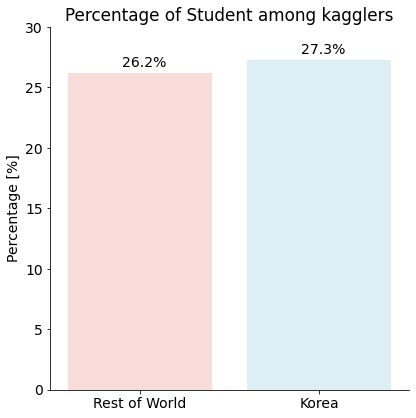

In [6]:
temp = data.groupby('korea')['Q5'].value_counts().to_frame()
temp.columns = ['amount']
temp = temp.reset_index(drop = False)
temp = temp.pivot(index = 'korea', columns='Q5')['amount']

temp['all'] = temp.sum(axis = 1)

for c in temp.columns:
    temp[c] = temp[c] / temp['all'] * 100

temp = temp.drop(['all'], axis = 1)
temp = temp[data['Q5'].value_counts().index]

temp = temp.reset_index(drop = False)
g = sns.catplot(x = 'korea', y = 'Student', kind = 'bar', data = temp,
               height = 6, aspect = 1/1,
               palette = [other_color, korea_color], alpha = 0.3)

g.ax.set_ylim(0, 30)
for p in g.ax.patches:
    txt = str(p.get_height().round(1)) + '%'
    txt_x = p.get_x() + 0.3
    txt_y = p.get_height() + 0.5
    g.ax.text(txt_x, txt_y, txt)

g.ax.set_xlabel('')
g.ax.set_xticklabels(['Rest of World', 'Korea'])
g.ax.set_ylabel('Percentage [%]')
g.ax.set_title('Percentage of Student among kagglers')
plt.show()

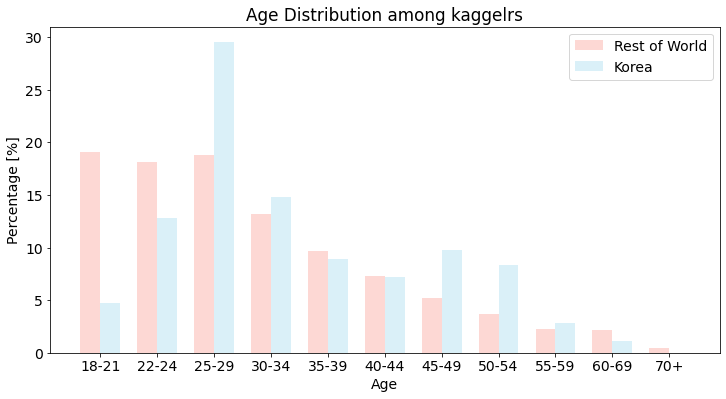

In [7]:
temp = data.groupby('korea').Q1.value_counts(normalize = True).to_frame()
temp = temp * 100
temp.columns = ['amount']

temp = temp.reset_index(drop = False)
temp = temp.pivot(index = 'korea', columns='Q1')['amount']
temp = temp.T
temp.columns = ['Row', 'Korea']
labels = temp.index.values
y1 = temp['Row'].values
y2 = temp['Korea'].values
y2[-1] = 0

width = 0.35
f, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (12, 6))
x = np.arange(len(labels))
rects1 = ax.bar(x - width/2, y1, width, label = 'Rest of World', color = other_color, alpha = 0.3)
rects2 = ax.bar(x + width/2, y2, width, label = 'Korea', color = korea_color, alpha = 0.3)
plt.xlabel('Age', )
plt.ylabel('Percentage [%]')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation = 360)
plt.legend()
plt.title('Age Distribution among kaggelrs')
plt.show()

<a id="top"></a>
<div class="list-group" id="list-tab" role="tablist">
<h3 class="list-group-item list-group-item-action active" data-toggle="list" style='color:white; background-image:url("https://storage.googleapis.com/kaggle-competitions/kaggle/31480/logos/header.png?t=2021-10-05-16-58-19"); border:0' role="tab" aria-controls="home">
<left><font size = '30'>Career Distribution among Korean kaggelr's</font></left></h3>

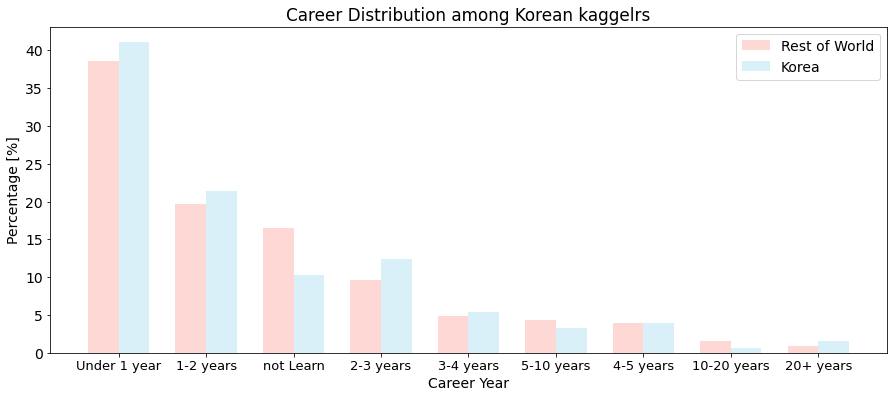

In [8]:
temp = data.groupby('korea')['Q15'].value_counts().to_frame()

temp.columns = ['amount']
temp = temp.reset_index(drop = False)
temp = temp.pivot(index = 'korea', columns='Q15')['amount']
temp['all'] = temp.sum(axis = 1)

for c in temp.columns:
    temp[c] = temp[c] / temp['all']*100
temp = temp.drop(['all'], axis = 1)
temp = temp[data['Q15'].value_counts().index]
temp = temp.reset_index(drop = False)
temp.rename(columns={'I do not use machine learning methods' : 'not Learn'}, inplace = True)
temp = temp.T
temp.columns = ['Row', 'Korea']
temp = temp[1:]
labels = temp.index.values
labels[-1] = '20+ years'
y1 = temp['Row'].values
y2 = temp['Korea'].values


width = 0.35
f, ax = plt.subplots(nrows = 1, ncols= 1, figsize = (15, 6))
x = np.arange(len(labels))
rects1 = ax.bar(x - width/2, y1, width, label = 'Rest of World', color = other_color, alpha = 0.3)
rects2 = ax.bar(x + width/2, y2, width, label = 'Korea', color = korea_color, alpha = 0.3)
plt.xlabel('Career Year')
plt.ylabel('Percentage [%]')
plt.xticks(np.arange(9), labels=labels, fontsize = 13)
plt.xticks
plt.legend()
plt.title('Career Distribution among Korean kaggelrs')
plt.show()

<a id="top"></a>
<div class="list-group" id="list-tab" role="tablist">
<h3 class="list-group-item list-group-item-action active" data-toggle="list" style='color:white; background-image:url("https://storage.googleapis.com/kaggle-competitions/kaggle/31480/logos/header.png?t=2021-10-05-16-58-19"); border:0' role="tab" aria-controls="home">
<left><font size = '30'>kinds of Kaggler's Occupation</font></left></h3>

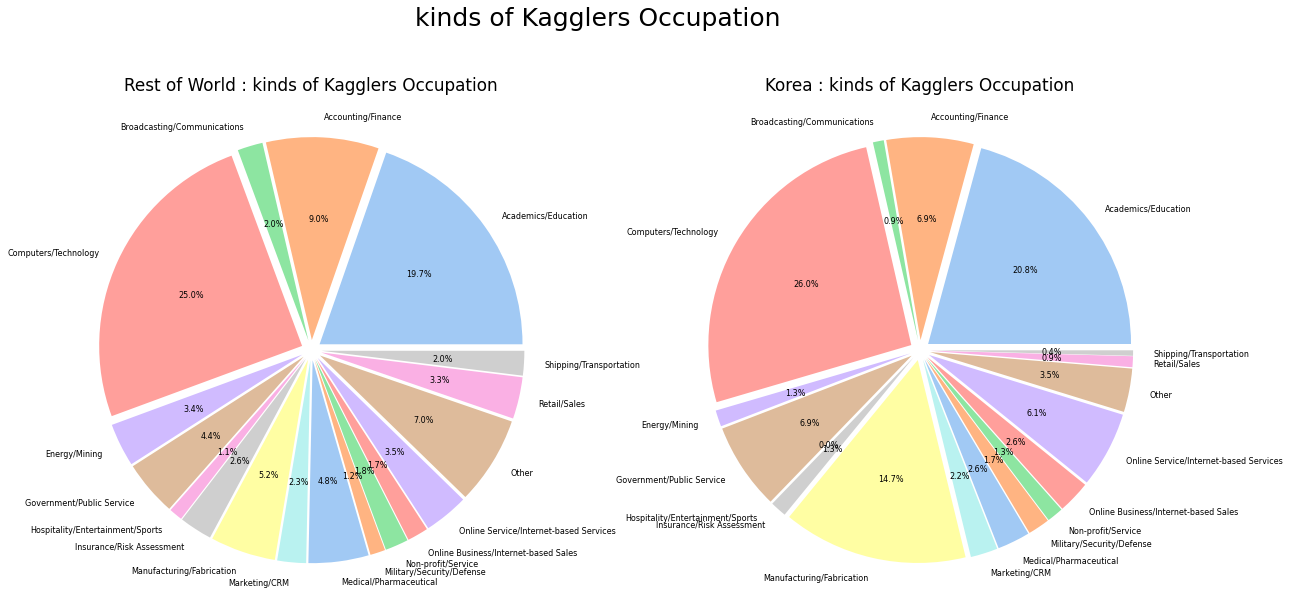

In [55]:
temp = data.groupby('korea')['Q20'].value_counts().to_frame()
temp.columns = ['amount']
temp = temp.reset_index(drop = False)
temp = temp.pivot(index = 'korea', columns='Q20')['amount']
temp['all'] = temp.sum(axis = 1)

for c in temp.columns:
    temp[c] = temp[c] / temp['all']*100
temp = temp.drop(['all'], axis = 1)
temp = temp.T
temp.columns = ['Row', 'Korea']
labels = temp.index.values
y1 = temp['Row'].values
y2 = temp['Korea'].values
y2[6] = 0
explode = [0.05 for i in range(18)]

plt.figure(figsize = (20, 10))
plt.subplot(1, 2, 1)
color = sns.color_palette('pastel')[:18]
plt.pie(y1, labels = labels, colors=color, explode = explode, autopct='%1.1f%%', textprops= {'fontsize' : 8})
plt.title('Rest of World : kinds of Kaggler''s Occupation')
plt.subplot(1, 2, 2)
plt.pie(y2, labels = labels, colors=color, explode = explode, autopct='%1.1f%%',  textprops= {'fontsize' : 8})
plt.title('Korea : kinds of Kaggler''s Occupation')
plt.suptitle('kinds of Kaggler''s Occupation', fontsize = 25)
plt.show()

### Reference
Thanks for sharing kernel, this kernels help me study about visualization.
if you have any time, checking

    - https://www.kaggle.com/code/kalelpark/all-about-spaceship-titanic-solutions
    - https://www.kaggle.com/code/subinium/kaggle-2020-visualization-analysis
    - https://www.kaggle.com/code/iamleonie/trying-this-in-japanese-en-sub
    
    